In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
df=pd.read_csv('advertising (1).csv')

In [10]:
df.head()

,Reel,Story,Post,Clicks
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
print(f"The shape of the data is: {df.shape}")
print(f"The size of the data is: {df.size}")

The shape of the data is: (200, 4)
The size of the data is: 800


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Reel    200 non-null    float64
 1   Story   200 non-null    float64
 2   Post    200 non-null    float64
 3   Clicks  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.describe()

,Reel,Story,Post,Clicks
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
if df.duplicated().sum() > 0:
    print(f"There are {df.duplicated().sum()} duplicated rows in the dataset.")
else:
    print("There are no duplicated rows in the dataset.")

There are no duplicated rows in the dataset.


In [15]:
if df.isnull().sum().any():
    print(f"There are {df.isnull().sum().sum()} null values in the dataset.")
else:
    print("There are no null values in the dataset.")

There are no null values in the dataset.


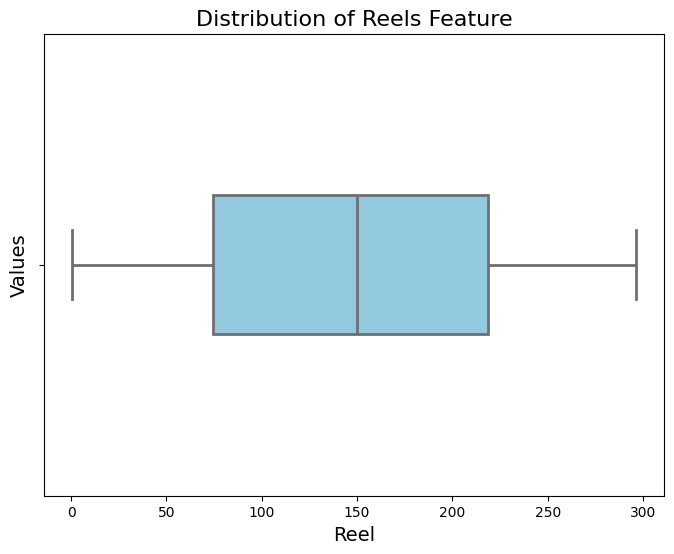

In [18]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df["Reel"], color='skyblue', width=0.3, linewidth=2)

# Add title and labels
plt.title("Distribution of Reels Feature", fontsize=16)
plt.xlabel("Reel", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Show the plot
plt.show()

In [19]:
x_all=df.iloc[:,0:3]
x=df.iloc[:,[0]]
y=df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.size,x_test.size

(140, 60)

In [21]:
from sklearn.linear_model import LinearRegression

# Assuming x_train is a pandas Series and y_train is a pandas Series
x_train_reshaped = x_train.values
y_train_reshaped = y_train.values  # No need to reshape y_train as it's the target variable

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train_reshaped, y_train_reshaped)

LinearRegression()

In [22]:
x_test_reshaped=x_test.values.reshape(-1,1)
y_pred=model.predict(x_test_reshaped)
residual=y_test-y_pred

c:\Users\MSHOME\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


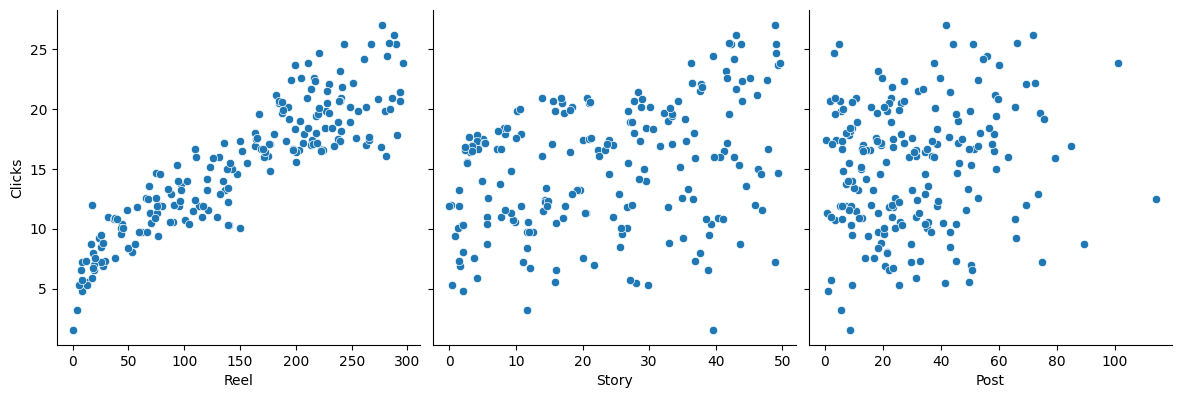

In [26]:
sns.pairplot(df, x_vars=['Reel', 'Story', 'Post'], y_vars='Clicks',
                               height=3,size=4, aspect=1, kind='scatter', markers='o')

In [27]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
vif=[]
for i in range (x_all.shape[1]):
    vif.append(variance_inflation_factor(x_all,i))

In [ ]:
pd.DataFrame({'vif':vif},index=df.columns[0:3]).T

In [ ]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

In [ ]:
sns.displot(residual,kind="kde",fill=True)
plt.title("Kernel Density Estimate")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

In [ ]:
# QQ Plot
import scipy as sp

fig,ax =plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)

plt.show()

In [ ]:
sns.scatterplot(x=y_pred, y=residual, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)  # Add a horizontal line at y=0
plt.title("Scatter Plot of Predicted vs. Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)  
plt.show()

In [ ]:
sns.lineplot(x=range(len(residual)), y=residual)

# Labeling axes
plt.xlabel("Index")
plt.ylabel("Residuals")

# Adding title
plt.title("Residual Plot")

# Show the plot
plt.show()

In [ ]:
# prediction on test data
y_pred

In [ ]:
print(f"The slope of the best fit is {model.coef_}")
print(f"The intercept of the best fit is {model.intercept_}")

In [ ]:
sns.regplot(x=x_train_reshaped, y=y_train_reshaped, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Regression Plot")
plt.xlabel("Predictor (x)")
plt.ylabel("Target Variable (y)")
plt.show()

In [ ]:
# Example: Predict the sales for advertisement expenditure spent on T.V (e.g., 200)
prediction_single_value = model.predict([[200]])
print(f'Prediction for a single value (200): {prediction_single_value[0]}')